# Analysis of Fashion Data via Tree Models, Ensembles, SVM's, and Categorical Naive Bayeas(In Class Exercise)

In [61]:
import pandas as pd
import numpy as np

# Read Fashion Data from csv file, and dummify predictors

In [64]:
fashion = pd.read_csv(r'C:\Users\anilc\OneDrive\Desktop\Anil\Data Mining\Data sets\fashion.csv', 
                      sep = "," , header = 'infer')
print(fashion.describe)
predictors = pd.get_dummies(fashion, columns = fashion.columns)
predictors2 = predictors.iloc[:,3:14]
response = fashion['RATING']

<bound method NDFrame.describe of       RATING     SEX    AGE      FASHION QUALITY   PRICE
0     Medium    Male    40+       Modern    High  Higher
1     Medium    Male  25-39  Traditional     Low  Higher
2     Medium  Female  16-24  Traditional     Low   Lower
3     Medium  Female  16-24       Modern    High   Lower
4        Low  Female  16-24       Modern     Low  Higher
...      ...     ...    ...          ...     ...     ...
1995  Medium    Male    40+  Traditional    High   Lower
1996  Medium  Female  16-24       Modern    High  Higher
1997    High    Male  16-24  Traditional    High   Lower
1998     Low  Female    40+  Traditional    High   Lower
1999  Medium    Male  16-24  Traditional     Low   Lower

[2000 rows x 6 columns]>


# Classification Trees using DecisionTreeClassifier

['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']
0.62


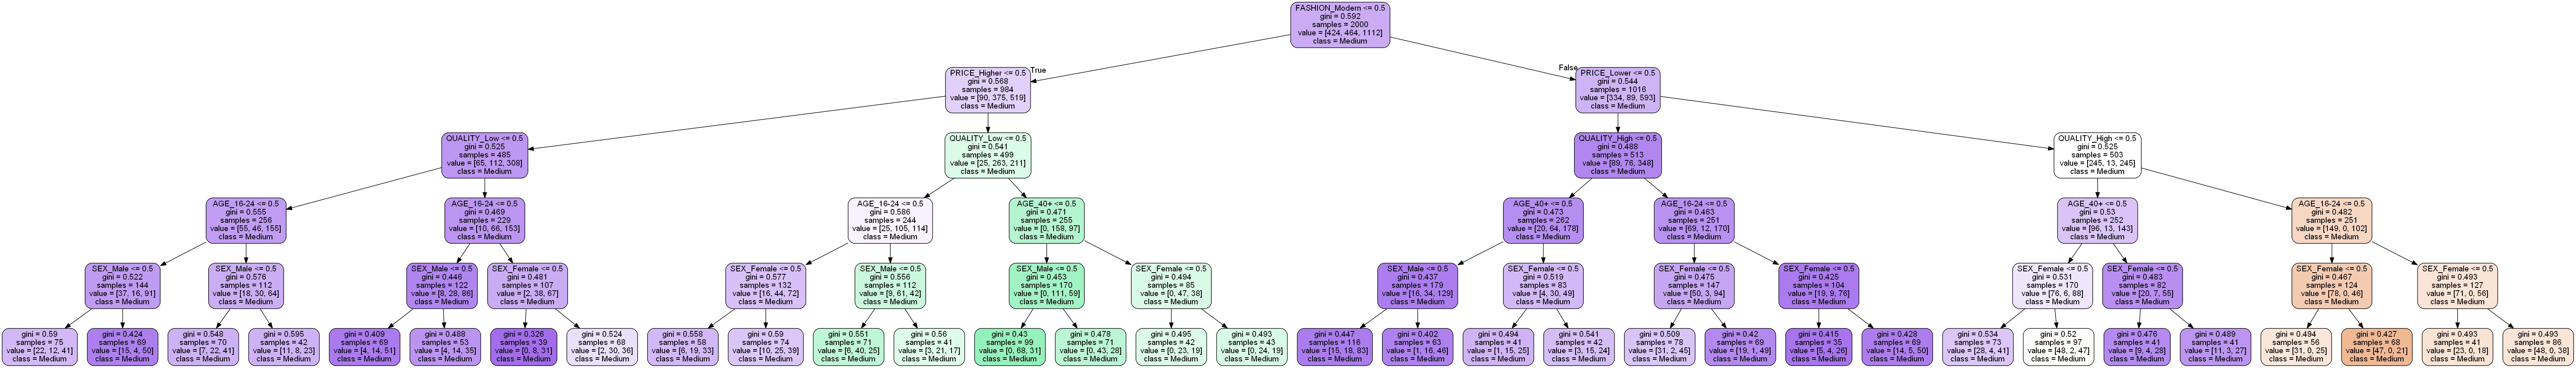

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#  Install pydotplus in Anaconda using the following command as is:
# conda install -c conda-forge pydotplus before using the import command below
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image
tree_dot = StringIO()

tree_clf = DecisionTreeClassifier(max_depth=5) 
tree_clf.fit(predictors2, response)
print(tree_clf.predict(predictors2))
print(tree_clf.score(predictors2, response))



export_graphviz(        
  tree_clf,        
  out_file = tree_dot,     
  feature_names=predictors2.columns,        
  class_names=response,        
  rounded=True,        
  filled=True    
 )
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue()) 
Image(tree_graph.create_png())

# Running GridSearch for tree Hyper-parameters using 10-fold CV

In [66]:
param_grid = {
    "max_depth":[3,4,5,], "criterion": ('gini', 'entropy'), "splitter": ('best', 'random')
}

tree_specification = DecisionTreeClassifier() 
tree_specification_CV = GridSearchCV(tree_specification, param_grid, verbose=1, cv=10)
results=tree_specification_CV.fit(predictors2,response)
#print(results.cv_results_)
print("The best parameter values are \n", results.best_params_)
print(tree_specification_CV.score(predictors2,response))
print(tree_specification_CV.predict(predictors2))
print(tree_specification_CV.predict_proba(predictors2))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameter values are 
 {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.6195
['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']
[[0.34013605 0.02040816 0.63945578]
 [0.         0.65294118 0.34705882]
 [0.01869159 0.35514019 0.62616822]
 ...
 [0.16071429 0.26785714 0.57142857]
 [0.25694444 0.11111111 0.63194444]
 [0.01869159 0.35514019 0.62616822]]


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


# Running RandomizedSearch for tree Hyper-parameters using 10-fold CV

In [67]:
param_grid = {
    "max_depth":[3,4,5,], "criterion": ('gini', 'entropy'), "splitter": ('best', 'random')
}

tree_specification = DecisionTreeClassifier() 
tree_specification_CV = RandomizedSearchCV(tree_specification, param_grid, verbose=1, cv=10, random_state=123,n_iter=10)
results=tree_specification_CV.fit(predictors2,response)
#print(results.cv_results_)
print("The best parameter values are \n", results.best_params_)
print(tree_specification_CV.score(predictors2,response))
print(tree_specification_CV.predict(predictors2))
print(tree_specification_CV.predict_proba(predictors2))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameter values are 
 {'splitter': 'random', 'max_depth': 4, 'criterion': 'entropy'}
0.6195
['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']
[[0.34013605 0.02040816 0.63945578]
 [0.         0.65294118 0.34705882]
 [0.01869159 0.35514019 0.62616822]
 ...
 [0.16071429 0.26785714 0.57142857]
 [0.25694444 0.11111111 0.63194444]
 [0.01869159 0.35514019 0.62616822]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


# Bagging CLasssifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=123, n_estimators=500, max_features = 5)
results=clf.fit(predictors2,response)
#print(results.cv_results_)
print(clf.score(predictors2,response))
print(clf.predict(predictors2))
print(clf.predict_proba(predictors2))

0.6195
['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']
[[0.26636784 0.0732407  0.66039147]
 [0.01734565 0.57711992 0.40553442]
 [0.06805881 0.302093   0.62984818]
 ...
 [0.17854261 0.21948548 0.60197191]
 [0.20041754 0.18401405 0.6155684 ]
 [0.07049507 0.28381391 0.64569103]]


# Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=123, n_estimators=500, max_features="sqrt")
results=clf.fit(predictors2,response)
#print(results.cv_results_)
print(clf.score(predictors2,response))
print(clf.predict(predictors2))
print(clf.predict_proba(predictors2))

0.609
['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']
[[0.27126132 0.10398028 0.6247584 ]
 [0.02628004 0.52366912 0.45005085]
 [0.08154192 0.3217278  0.59673029]
 ...
 [0.1927691  0.21765492 0.58957598]
 [0.21523894 0.19084916 0.5939119 ]
 [0.08288881 0.29518111 0.62193008]]


# Support Vector Machines - Linear

In [79]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

svm_clf = Pipeline((        
  ("scaler", StandardScaler()),        
  ("linear_svc", LinearSVC(C=1, loss="hinge")),    
  ))
svm_clf.fit(predictors2, response)
svm_clf.predict(predictors2)
svm_clf.score(predictors2, response)

0.556

# Support Vector Machines  - non-linear polynomial

In [80]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((        
  ("poly_features", PolynomialFeatures(degree=3)),        
  ("scaler", StandardScaler()),        
  ("svm_clf", LinearSVC(C=1, loss="hinge", max_iter=4000))    
  ))
polynomial_svm_clf.fit(predictors2, response)
polynomial_svm_clf.predict(predictors2)
polynomial_svm_clf.score(predictors2, response)

0.6225

# Polynomial Kernvel SVM

In [81]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline((        
  ("scaler", StandardScaler()),        
  ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))    
  )) 
poly_kernel_svm_clf.fit(predictors2, response)
poly_kernel_svm_clf.predict(predictors2)
poly_kernel_svm_clf.score(predictors2, response)

0.6225

# Gaussian RBF Kernel

In [82]:
rbf_kernel_svm_clf = Pipeline((        
  ("scaler", StandardScaler()),        
  ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))    
  )) 
rbf_kernel_svm_clf.fit(predictors2, response)
rbf_kernel_svm_clf.predict(predictors2)
rbf_kernel_svm_clf.score(predictors2,response)

0.556

# Adaptive Boosting

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(        
  DecisionTreeClassifier(max_depth=1), n_estimators=200, 
       algorithm="SAMME.R", learning_rate=0.5 
 )
ada_clf.fit(predictors2, response)
ada_clf.predict(predictors2)
ada_clf.score(predictors2,response)

0.6175

# Categorical Naive Bayes. Depending on types of predictors, one can use Gaussian Naive Bayes, Bernouli Naive Bayes, etc.


In [84]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(predictors2,response)
print(cnb.predict(predictors2))
cnb.score(predictors2,response)

['Medium' 'Low' 'Medium' ... 'Medium' 'Medium' 'Medium']


0.6125